In [4]:
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionStation import SizedistributionStation
from sectional_v2.util.collocate.collocateLONLAToutput import CollocateLONLATout
from sectional_v2.constants import sized_varListNorESM, list_sized_vars_noresm, list_sized_vars_nonsec
#from useful_scit.util import log
import useful_scit.util.log as log
import time
log.ger.setLevel(log.log.INFO)

In [35]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'
variables = sized_varListNorESM['NCONC'] + sized_varListNorESM['NMR'] + sized_varListNorESM['SIGMA']
cases_sec = []#'SECTv11_ctrl']
cases_orig =[]#'noSECTv11_ctrl'] #/noSECTv11_ctrl
cases_sec = ['SECTv21_ctrl_koagD','SECTv21_ctrl']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig =['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl
cases = cases_sec + cases_orig
from_t = '2008-05-01'
to_t = '2008-06-01'

In [36]:
import xarray as xr

In [15]:
f1 = '/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl/H2SO4_SECTv21_ctrl_2009-05-01_2009-06-01_hour_locations.nc'
da = xr.open_dataset(f1).sel(station='SMR')#.sel(time=slice(from_t, to_t))

In [19]:
_da = da.groupby('time.hour').mean('time')


In [24]:
import matplotlib.pyplot as plt

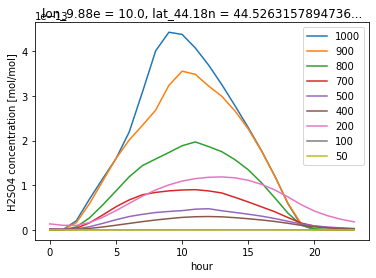

In [26]:
for i_lev in [1000,900,800,700,500,400,200,100,50]:
    _tmp =_da.sel(lev=i_lev, method='nearest')
    _tmp['H2SO4'].plot(label=i_lev)
plt.legend()

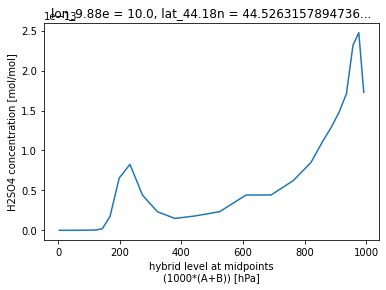

In [28]:
_da.mean('hour')['H2SO4'].plot()

In [74]:
f1 = '/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl/dNdlogD_sec_SECTv21_ctrl_2008-01-01_2009-01-01_hour_locations.nc'
da = xr.open_dataset(f1).isel(lev=-1).sel(station='SMR').sel(time=slice(from_t, to_t))

In [75]:
f2 = '/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_sec01_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc'
da2 = xr.open_dataset(f2).isel(lev=-1).sel(station='SMR').sel(time=slice(from_t, to_t))['dNdlogD_sec01']
for i in range(2,6):
    dNdlogD = f'dNdlogD_sec0{i}'
    f2 = f'/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/{dNdlogD}_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc'
    _da2 = xr.open_dataset(f2).isel(lev=-1).sel(station='SMR').sel(time=slice(from_t, to_t))[dNdlogD]
    da2 = da2+_da2
    
    

In [9]:
da2

<xarray.DataArray (time: 768, diameter: 61)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    lat_45.77n  float64 46.42
    lon_7.95e   float64 7.5
    lon_7.92e   float64 7.5
    lon_10.77e  float64 10.0
    lon_11.00e  float64 10.0
    lon_8.63e   float64 7.5
    lon_8.25e   float64 7.5
    lon_7.98e   float64 7.5
    lon_17.38e  float64 17.5
    lat_67.97n  float64 67.26
    lat_55.92n  float64 55.89
    lon_23.58e  float64 22.5
    lat_51.53n  float64 52.11
    lat_47.92n  float64 48.32
    lon_24.12e  float64 25.0
    lon_10.98e  float64 10.0
    lat_47.80n  float64 48.32
    lon_1.32e   float64 2.5
    lon_15.08e  float64 15.0
    lon_9.88e   float64 10.0
    lon_12.90e  float64 12.5
    lat_58.80n  float64 59.68
    lon_4.92e   float64 5.0
    lon_21.00e  float64 20.0
    lat_46.53n  float64 46.42
    lat_56.02n  float64 55.89
    lon_11.90e  float64 12.5
    lat_35.33n  float64 35.05
    lat_47.42n  float64 48.32
    lat_53.00n  float64 52.11
    lon_10.68e  float64 10.0
    lat_51.30n  float64 52.11
    lat_52.52n  float64 52.11
    lat_42.17n  float64 42.63
    lon_25.67e  float64 25.0
    lat_78.92n  float64 78.63
    lat_51.57n  float64 52.11
    lon_2.95e   float64 2.5
    lat_58.38n  float64 57.79
    lon_19.55e  float64 20.0
    lat_53.32n  float64 54.0
    lat_46.97n  float64 46.42
    lat_45.82n  float64 46.42
    lat_61.85n  float64 61.58
    lat_49.58n  float64 50.21
    lon_24.28e  float64 25.0
    lon_13.15e  float64 12.5
    lat_44.18n  float64 44.53
    station     <U3 'SMR'
    lev         float64 992.6
  * time        (time) datetime64[ns] 2008-05-01 ... 2008-06-01T23:00:00
  * diameter    (diameter) float64 1.0 1.1 1.3 1.4 ... 708.0 794.3 891.2 1e+03
Attributes:
    units:      cm-3
    long_name:  dNdlogD (sectional01)

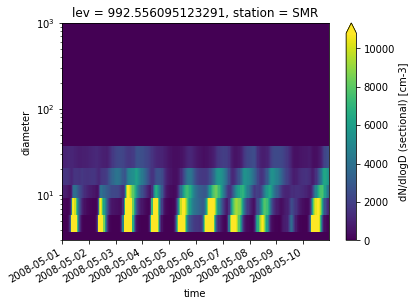

In [20]:
da.groupby('time.hour'['dNdlogD_sec'].plot(y='diameter', yscale='log', ylim=[3,1e3], robust=True)#.isel(time=slice(from_t, to_t))

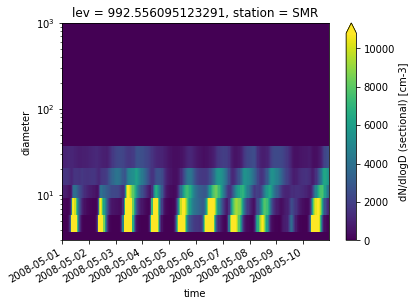

In [20]:
da.sel(time=slice('2008-05-01','2008-05-10'))['dNdlogD_sec'].plot(y='diameter', yscale='log', ylim=[3,1e3], robust=True)#.isel(time=slice(from_t, to_t))

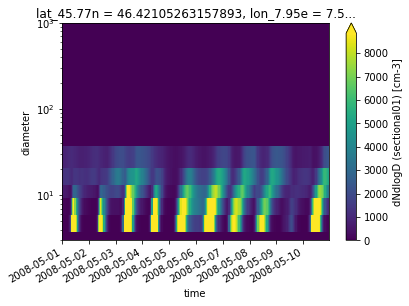

In [29]:
da2.sel(time=slice('2008-05-01','2008-05-10')).plot(y='diameter', yscale='log', ylim=[3,1e3], robust=True)

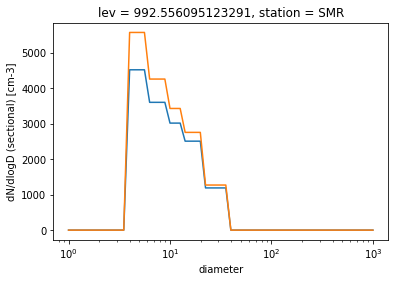

In [55]:
da2.sel(time=slice('2008-05-01','2008-05-10')).mean('time').plot(xscale='log')#y='diameter', yscale='log', ylim=[3,1e3], robust=True)
da['dNdlogD_sec'].sel(time=slice('2008-05-01','2008-05-10')).mean('time').plot(xscale='log')#y='diameter', yscale='log', ylim=[3,1e3], robust=True)

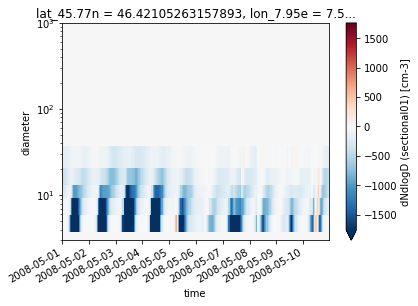

In [28]:
(da2-da['dNdlogD_sec']).sel(time=slice('2008-05-01','2008-05-10')).plot(y='diameter', yscale='log', ylim=[3,1e3], robust=True)

In [44]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'
variables = sized_varListNorESM['NCONC'] + sized_varListNorESM['NMR'] + sized_varListNorESM['SIGMA']
cases_sec = []#'SECTv11_ctrl']
cases_orig =[]#'noSECTv11_ctrl'] #/noSECTv11_ctrl
cases_sec = [ 'SECTv21_ctrl_koagD']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig =['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

from_t = '2008-05-01'
to_t = '2008-06-01'

## Collocate NCONC\*, NMR\* and SIGMA\*

In [45]:
varl_s=['COAGNUCL','NMR01','NCONC01','SO4_NAcondTend', 'SOA_NAcondTend','H2SO4','FORMRATE','NUCLRATE']
varl_o=['COAGNUCL','NMR01','NCONC01','SO4_NAcondTend', 'SOA_NAcondTend','H2SO4','FORMRATE','NUCLRATE']
dic_sd={}
for case_name in cases_sec:
    varlist =varl_s
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    dic_sd[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl_o
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    dic_sd[case_name]=a

    


/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/COAGNUCL_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NMR01_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/NCONC01_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/SO4_NAcondTend_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/SOA_NAcondTend_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//collocated_ds//NorESM/SECTv21_ctrl_koagD/H2SO4_SECTv21_ctrl_koagD_2008-05-01_2008-06-01_hour_locations.nc
/home/ubuntu/mnts

In [46]:
import numpy as np
from useful_scit.imps import (np, plt, pd)

In [47]:
stations = dic_sd[cases_sec[0]]['station'].values

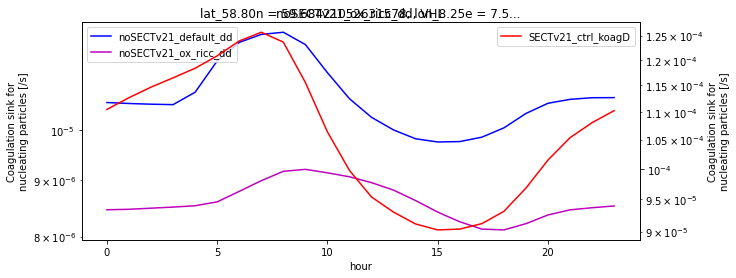

In [71]:
import matplotlib.colors as mcolors
st = '2008-05-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'COAGNUCL'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
lns = []
for case_name, col in zip(cases,['r','b','m']):
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    if 'noSEC' not in case_name:
        twax = ax.twinx()
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=twax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    else:
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=ax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    ax.set_title(f'{case_name}, {stations[i]}')
        
ax.legend(loc=2)
twax.legend(loc=1)
plt.show()

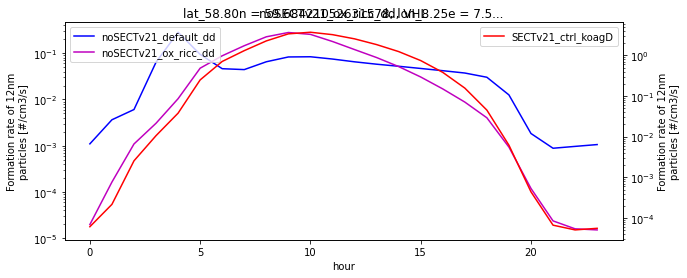

In [73]:
import matplotlib.colors as mcolors
st = '2008-05-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'FORMRATE'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
lns = []
for case_name, col in zip(cases,['r','b','m']):
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    if 'noSEC' not in case_name:
        twax = ax.twinx()
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=twax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    else:
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=ax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    ax.set_title(f'{case_name}, {stations[i]}')
        
ax.legend(loc=2)
twax.legend(loc=1)
plt.show()

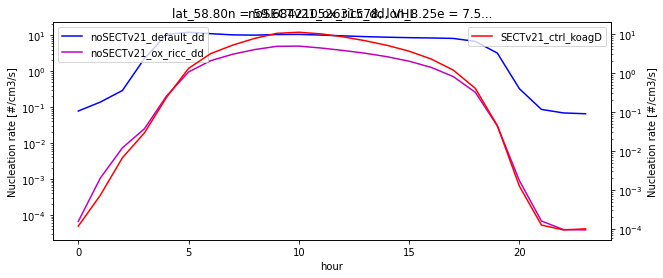

In [72]:
import matplotlib.colors as mcolors
st = '2008-05-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'NUCLRATE'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
lns = []
for case_name, col in zip(cases,['r','b','m']):
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    if 'noSEC' not in case_name:
        twax = ax.twinx()
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=twax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    else:
        l = plt_da.plot(label=case_name, c=col, yscale=yscale, ax=ax)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        lns.append(lns)
    ax.set_title(f'{case_name}, {stations[i]}')
        
ax.legend(loc=2)
twax.legend(loc=1)
plt.show()

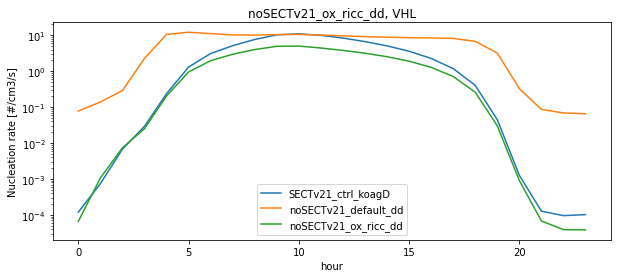

In [48]:
import matplotlib.colors as mcolors
st = '2008-05-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'NUCLRATE'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

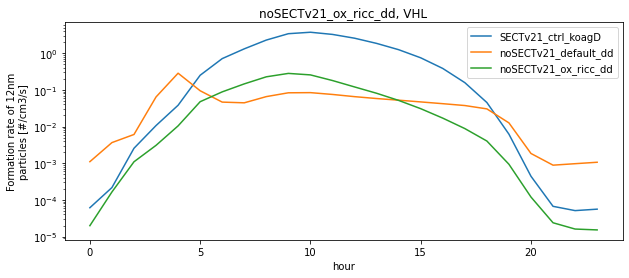

In [49]:
import matplotlib.colors as mcolors
st = '2008-05-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'FORMRATE'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

# condTend --> formrate
$$
condTend \cdot \rho_{aer}^{-1}\cdot V_{aer}^{-1}=kg/m^2/s \cdot m^3/kg \cdot \#/m^3 = \#/m^2/s
$$

In [37]:
rho_so4=1769.0#
rho_soa = 1500.0#_r8 
r_form = 11.8*1e-9
v_aer = np.pi*4/3*r_form**3
v_aer

6.882316347750595e-24

In [38]:
d_form =(r_form*2)

In [39]:
def comp_number_tend(condTend, rho):
    return condTend/rho/v_aer

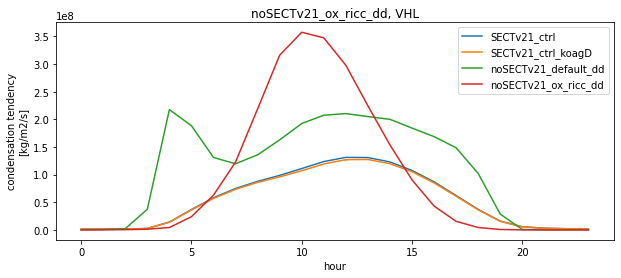

In [40]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'SOA_NAcondTend'
var2 = 'SO4_NAcondTend'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da1 = comp_number_tend(plt_ds[var], rho_soa)# + plt_ds[var2]
    plt_da2 = comp_number_tend(plt_ds[var2], rho_so4)# + plt_ds[var2]
    plt_da = plt_da1+plt_da2
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

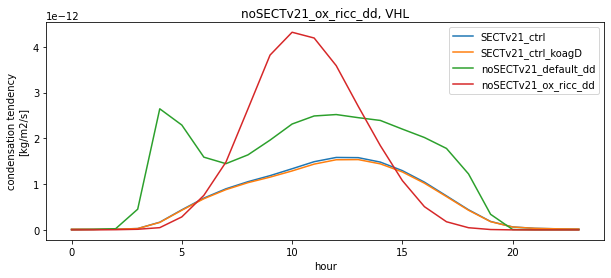

In [41]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'SOA_NAcondTend'
var2 = 'SO4_NAcondTend'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var] + plt_ds[var2]
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

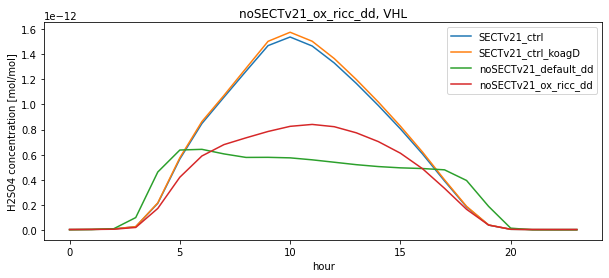

In [42]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'H2SO4'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

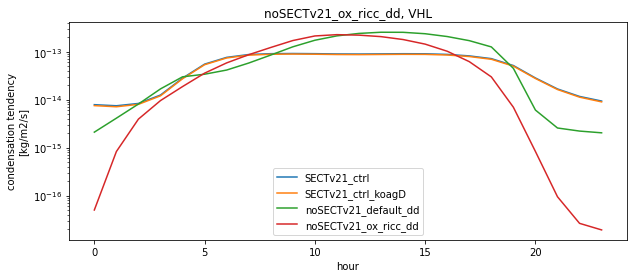

In [43]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'SOA_NAcondTend'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

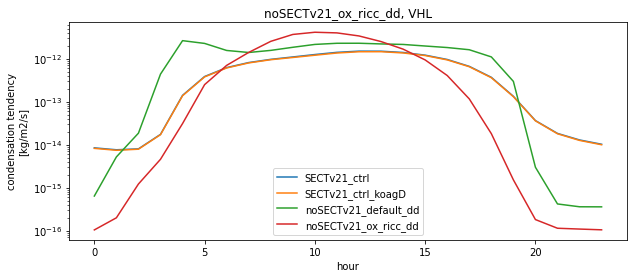

In [44]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='log'
cmap='viridis'
var = 'SO4_NAcondTend'
fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
axs=[axs]
for case_name in cases:
    ax = axs[0]
    plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
    plt_ds = plt_ds.sel(time=slice(st,et)).isel( lev=-1).mean('station')
    plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
    plt_da = plt_da.groupby('time.hour').mean()
    plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
    ax.set_title(f'{case_name}, {stations[i]}')
        
plt.legend()
plt.show()

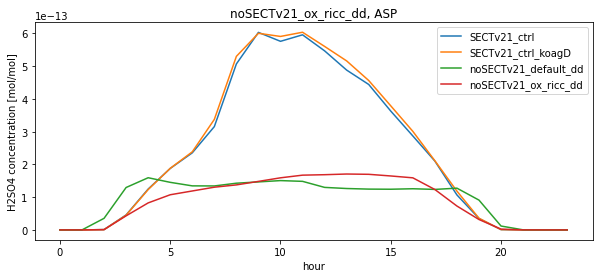

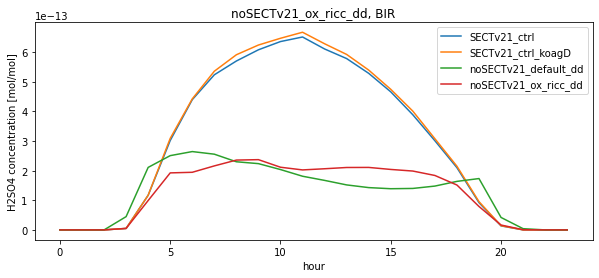

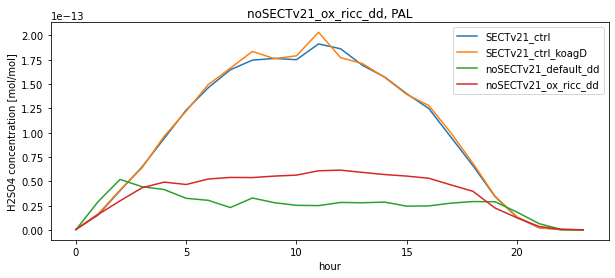

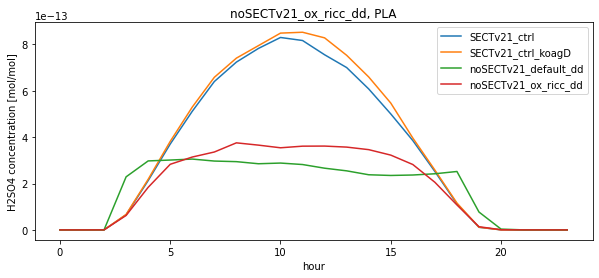

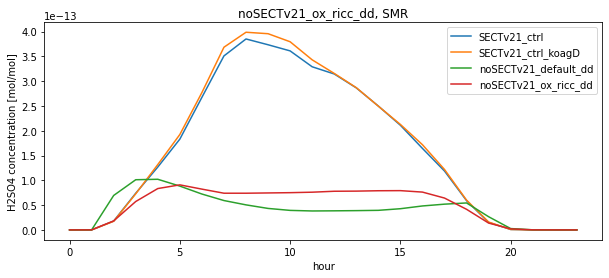

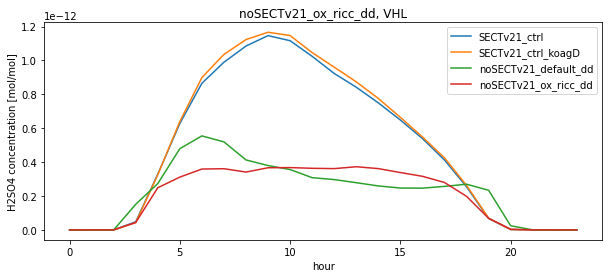

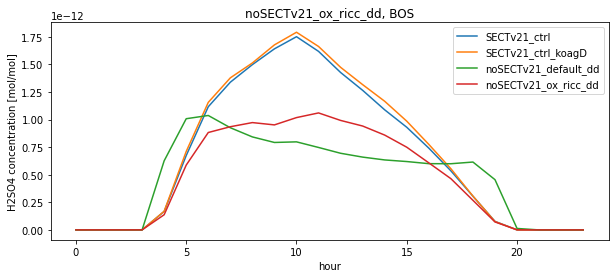

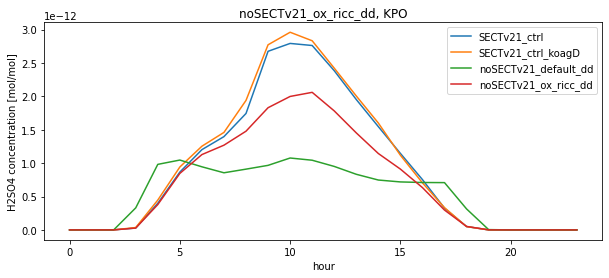

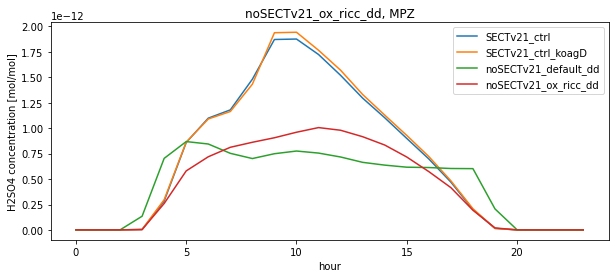

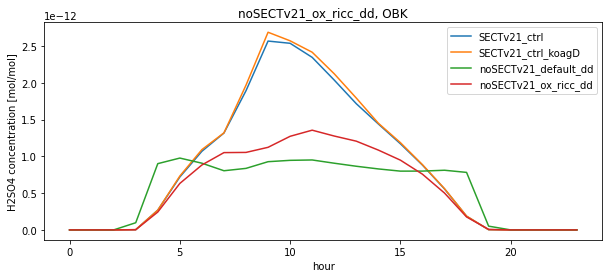

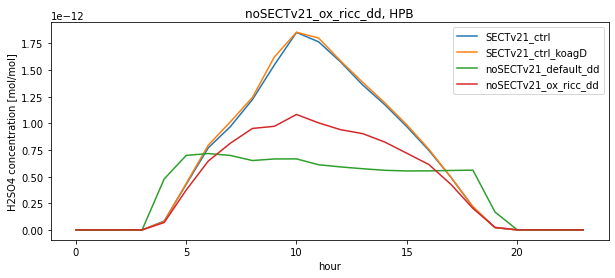

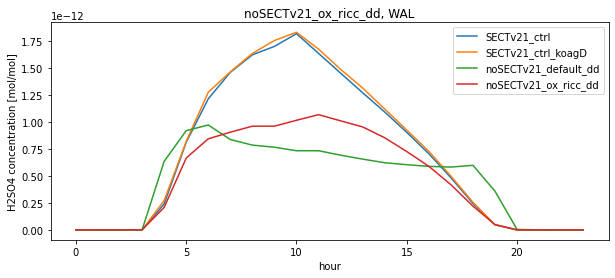

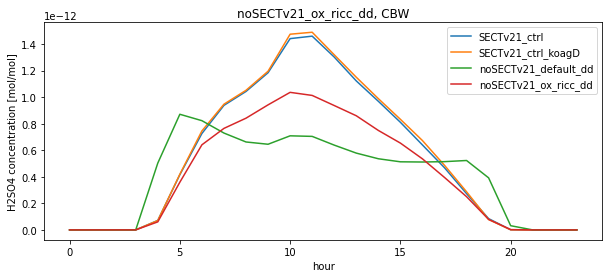

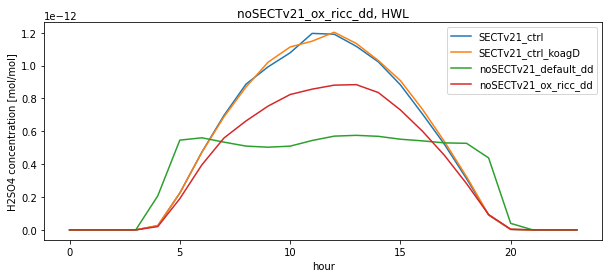

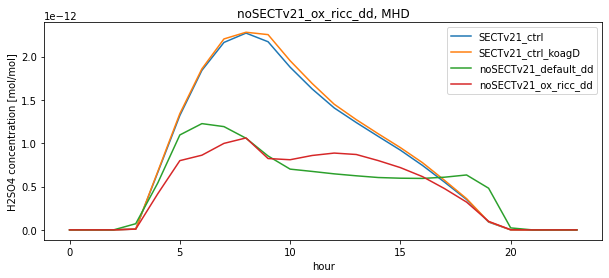

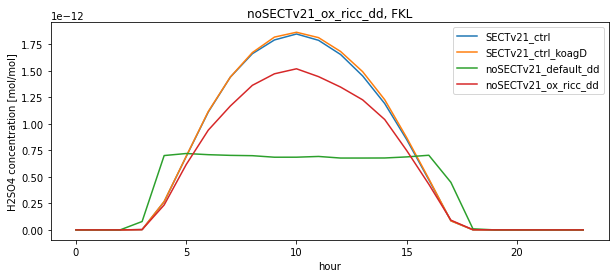

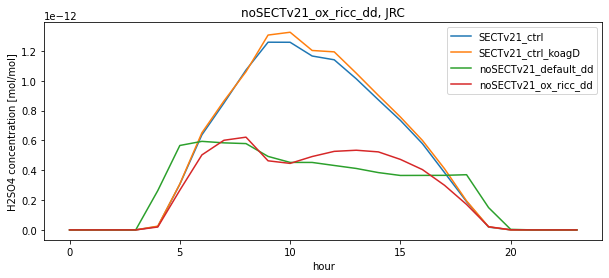

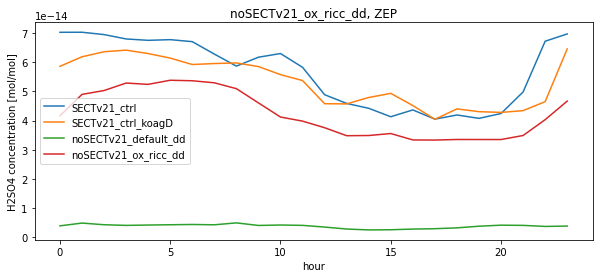

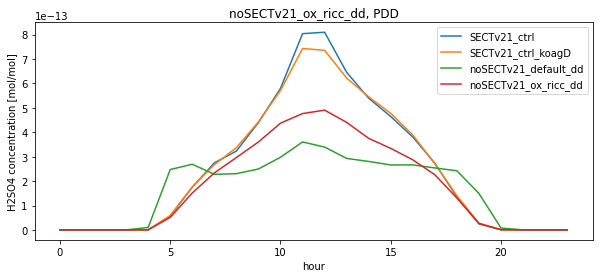

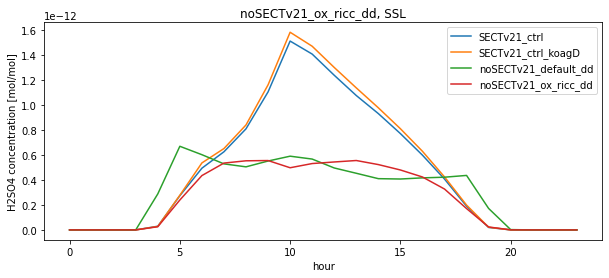

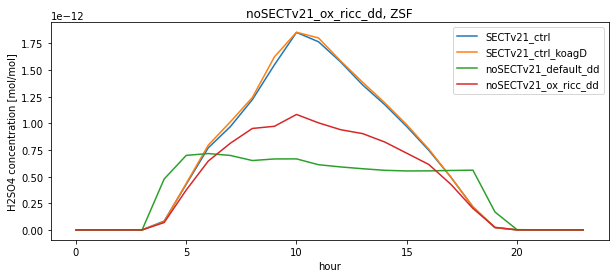

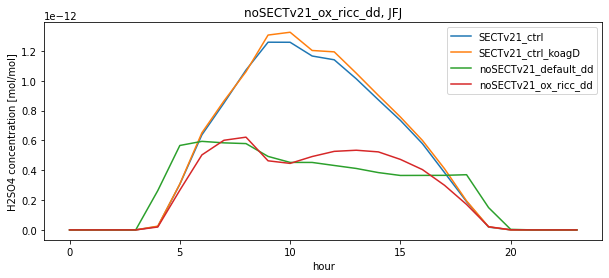

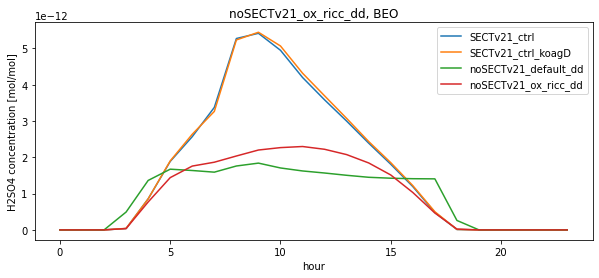

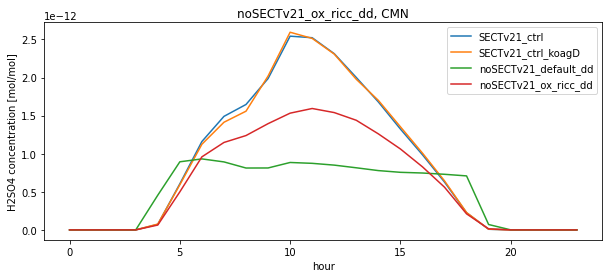

In [56]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'H2SO4'
for i in np.arange(len(stations)):
    fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
    axs=[axs]
    for case_name in cases_sec:
        ax = axs[0]
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
        
    for case_name in cases_orig:#, axs[1:]):
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        
        plt_da.plot(label=case_name, yscale=yscale)#'log')#x='hour', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
    #    plt_da = (dic_sd[case_name]['dNdlogD_mod'])
    #    plt_da = plt_da.sel(time=slice(st,et)).isel(station=i, lev=-1)
    #    
    #    plt_da.plot(x='time', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap='Reds', ax=ax)
    #    ax.set_title(case_name)

    plt.legend()
    plt.show()

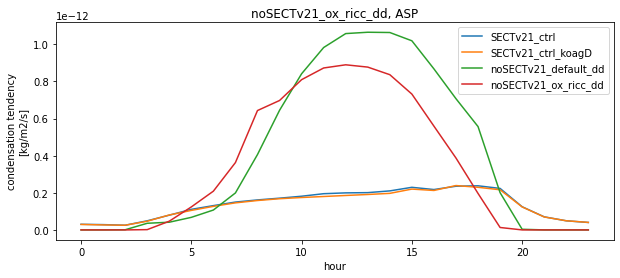

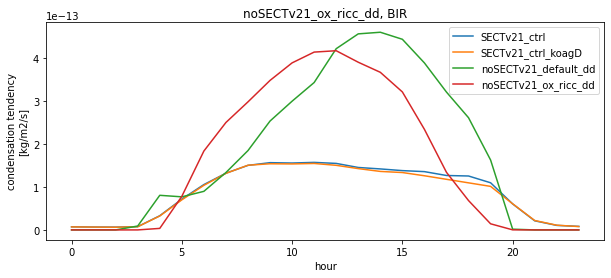

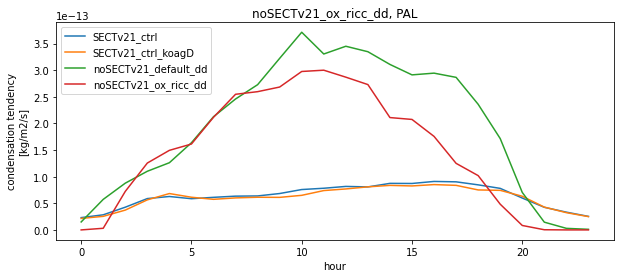

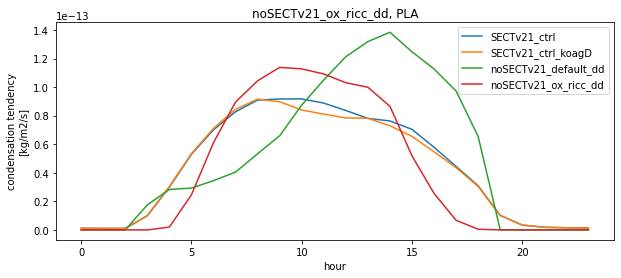

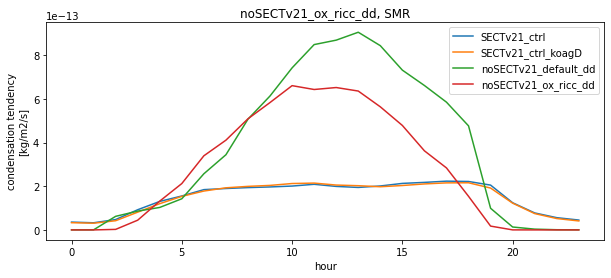

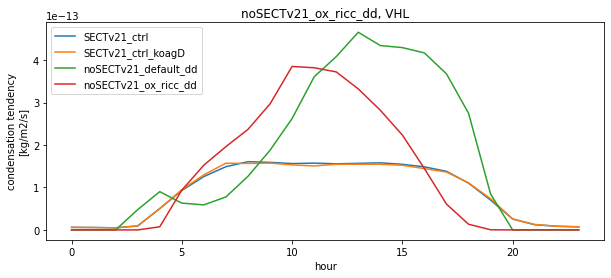

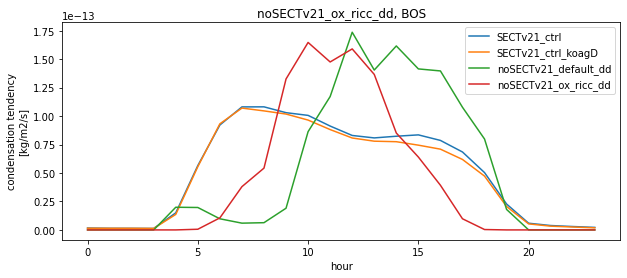

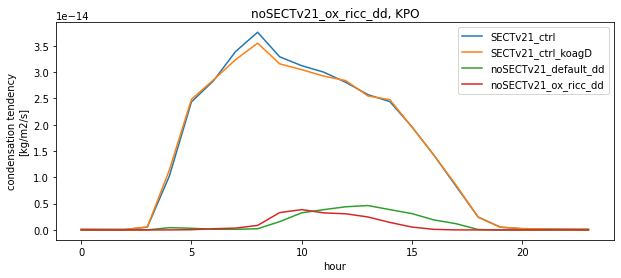

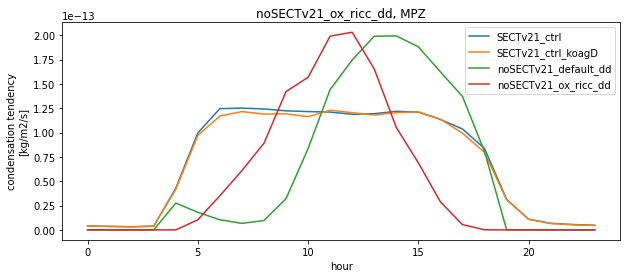

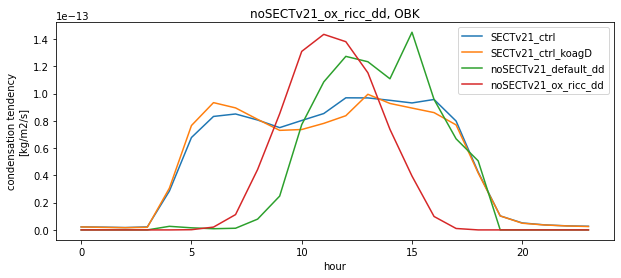

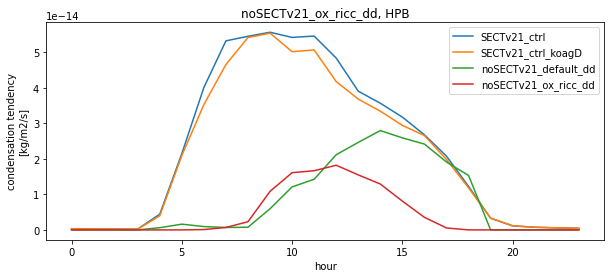

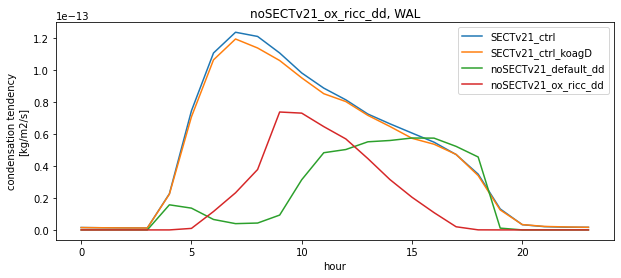

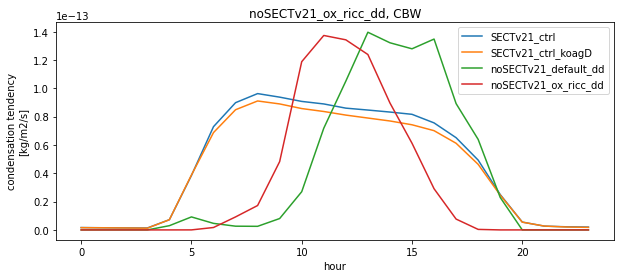

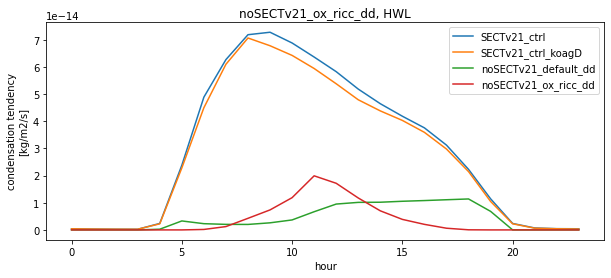

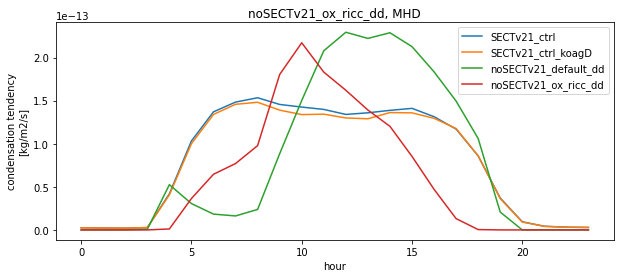

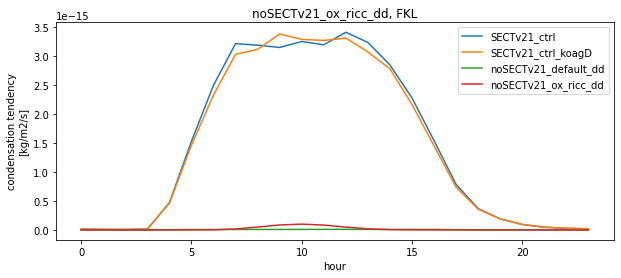

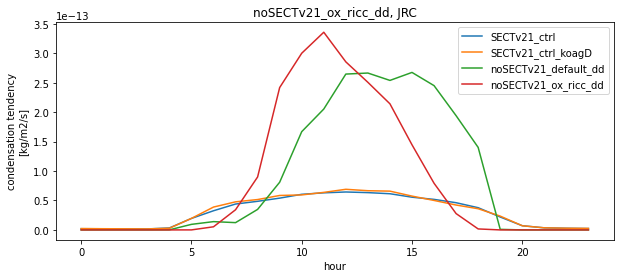

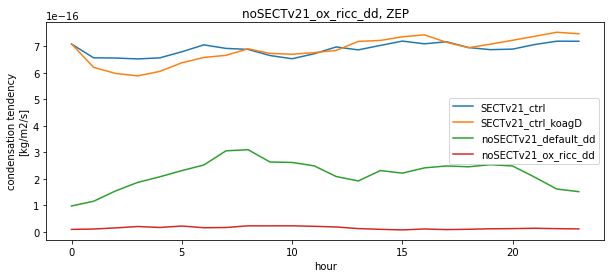

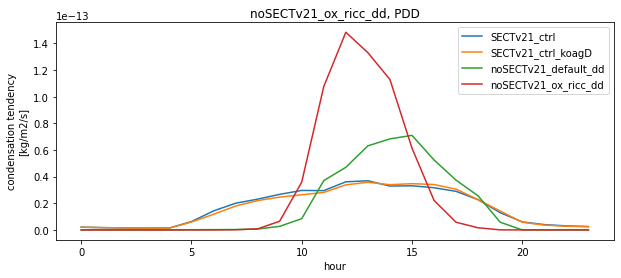

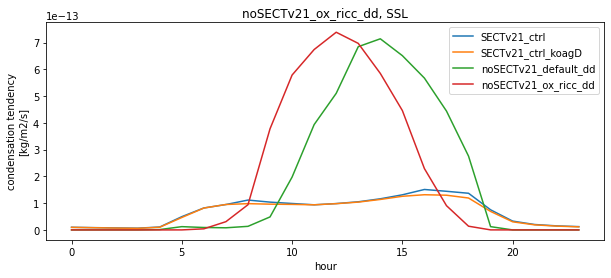

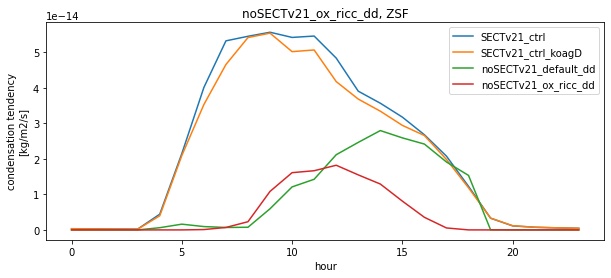

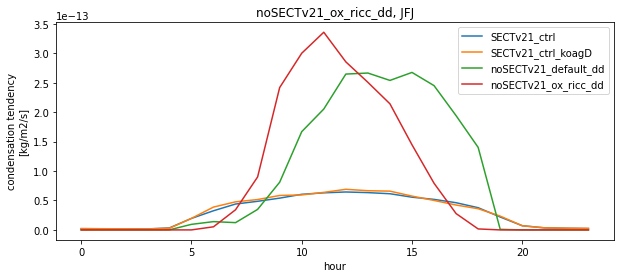

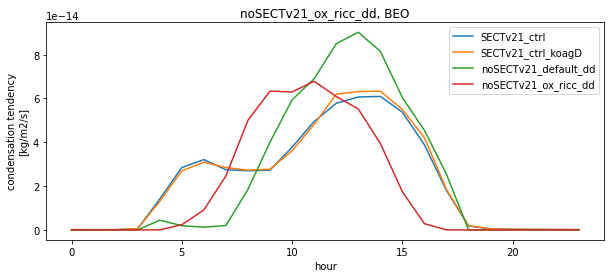

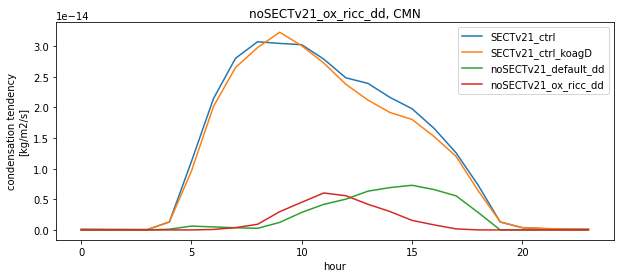

In [48]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'SOA_NAcondTend'
for i in np.arange(len(stations)):
    fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
    axs=[axs]
    for case_name in cases_sec:
        ax = axs[0]
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
        
    for case_name in cases_orig:#, axs[1:]):
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        
        plt_da.plot(label=case_name, yscale=yscale)#'log')#x='hour', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
    #    plt_da = (dic_sd[case_name]['dNdlogD_mod'])
    #    plt_da = plt_da.sel(time=slice(st,et)).isel(station=i, lev=-1)
    #    
    #    plt_da.plot(x='time', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap='Reds', ax=ax)
    #    ax.set_title(case_name)

    plt.legend()
    plt.show()

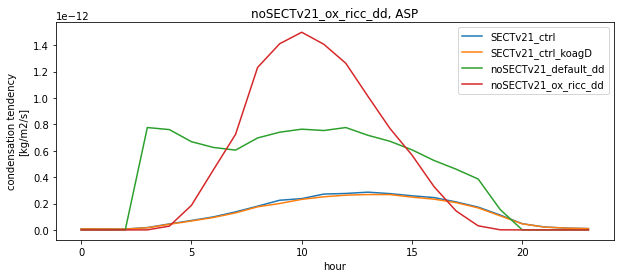

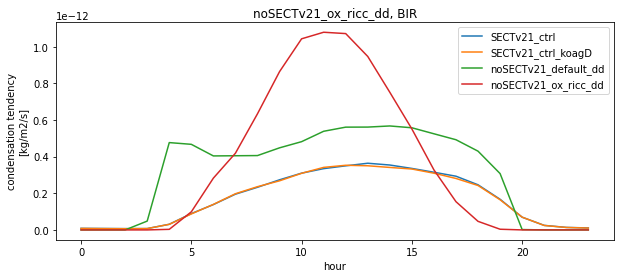

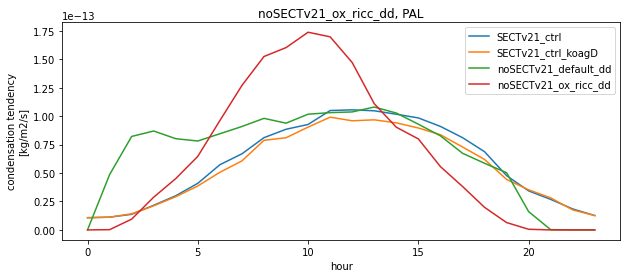

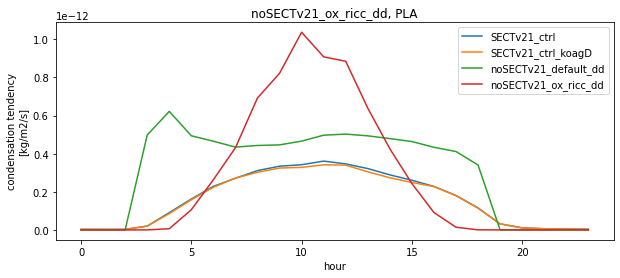

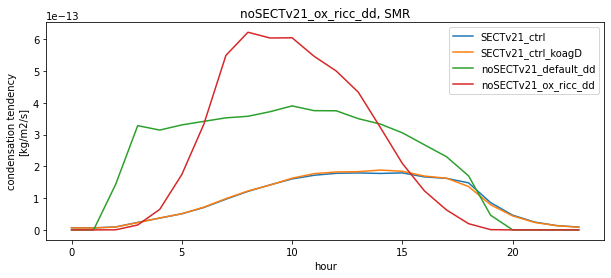

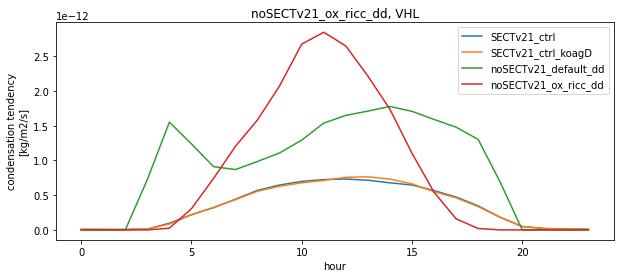

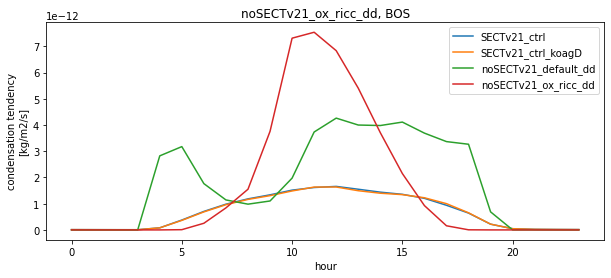

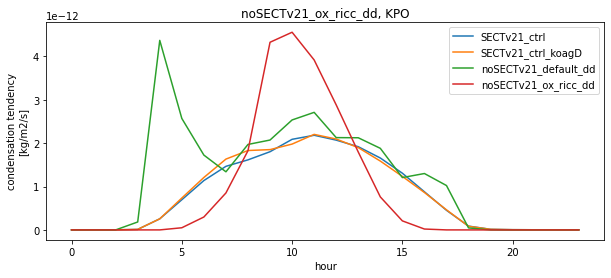

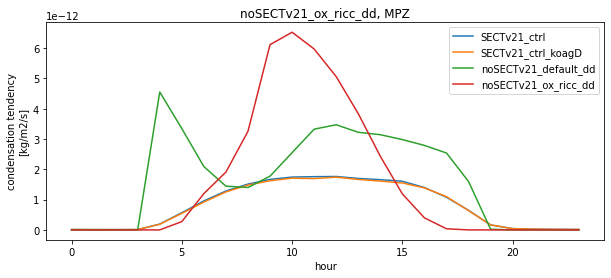

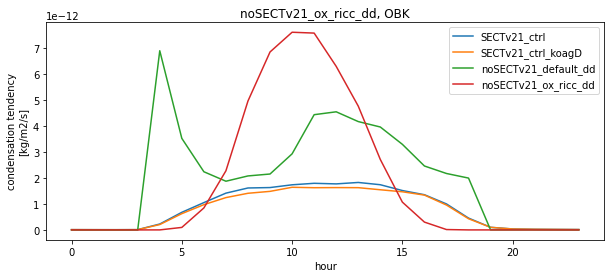

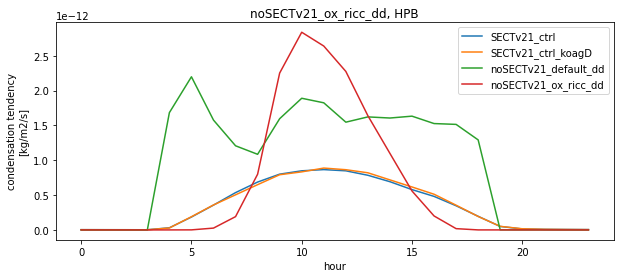

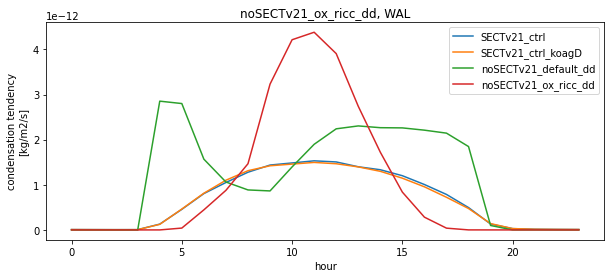

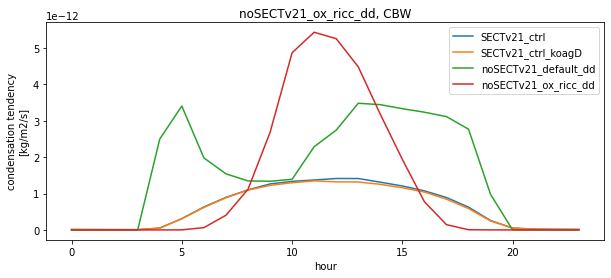

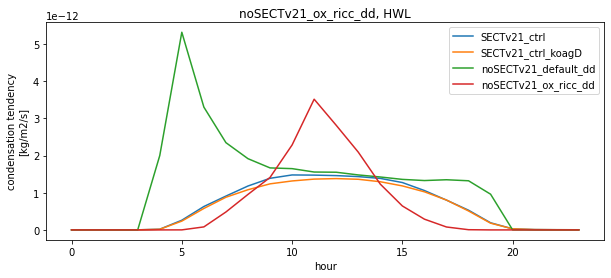

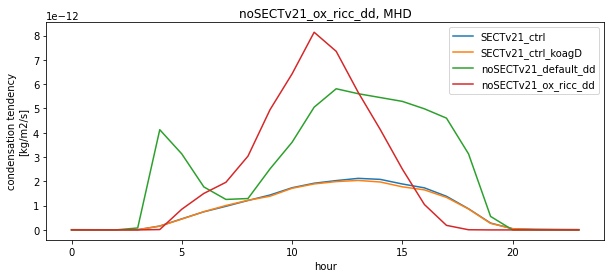

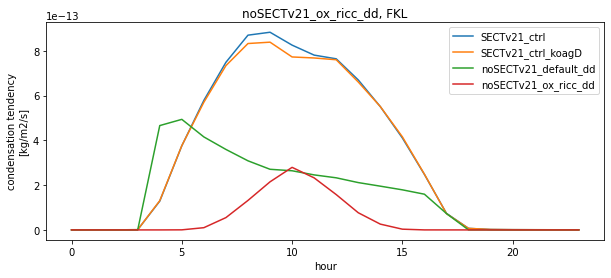

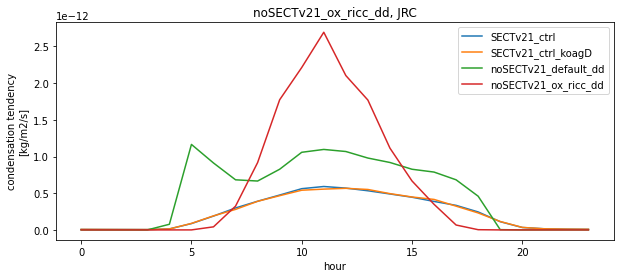

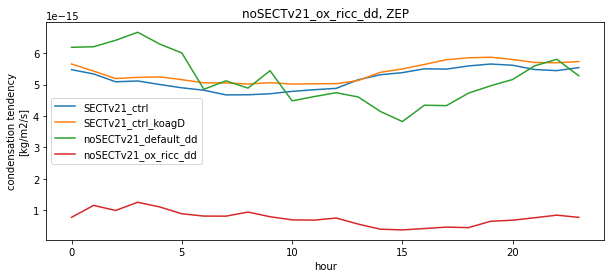

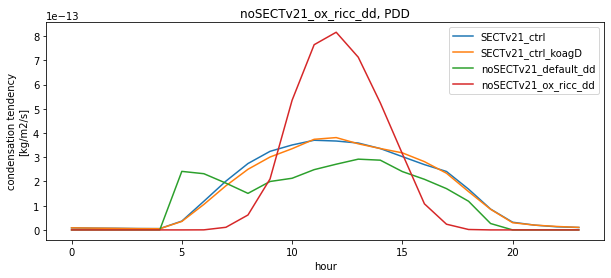

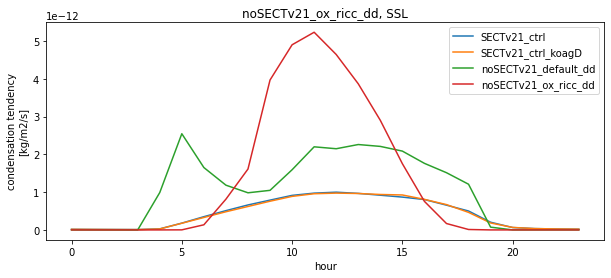

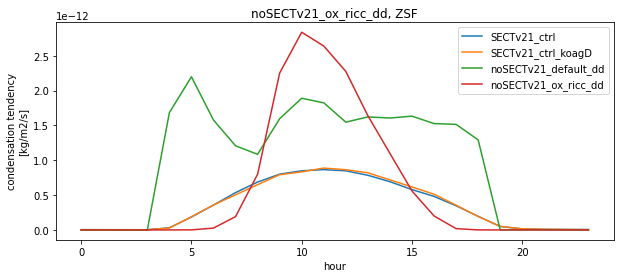

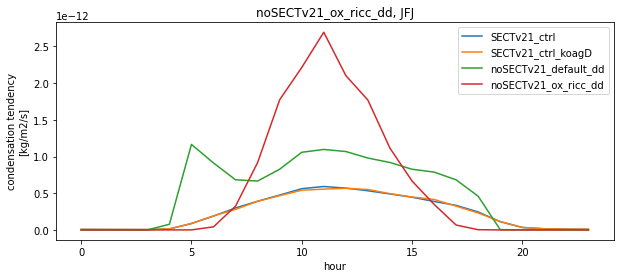

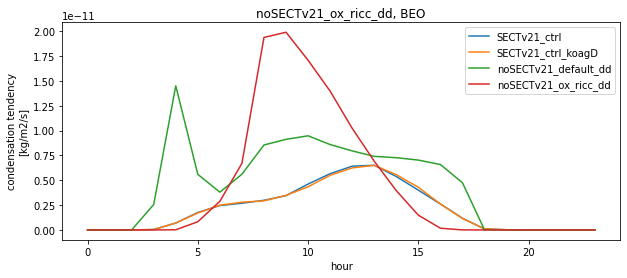

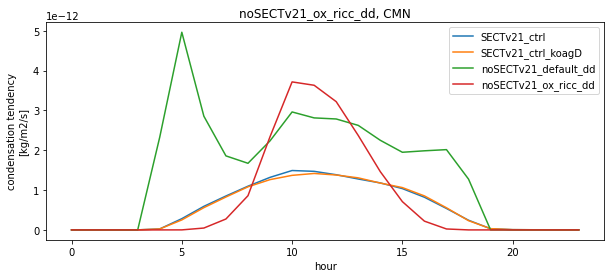

In [47]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'SO4_NAcondTend'
for i in np.arange(len(stations)):
    fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
    axs=[axs]
    for case_name in cases_sec:
        ax = axs[0]
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
        
    for case_name in cases_orig:#, axs[1:]):
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        
        plt_da.plot(label=case_name, yscale=yscale)#'log')#x='hour', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
    #    plt_da = (dic_sd[case_name]['dNdlogD_mod'])
    #    plt_da = plt_da.sel(time=slice(st,et)).isel(station=i, lev=-1)
    #    
    #    plt_da.plot(x='time', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap='Reds', ax=ax)
    #    ax.set_title(case_name)

    plt.legend()
    plt.show()

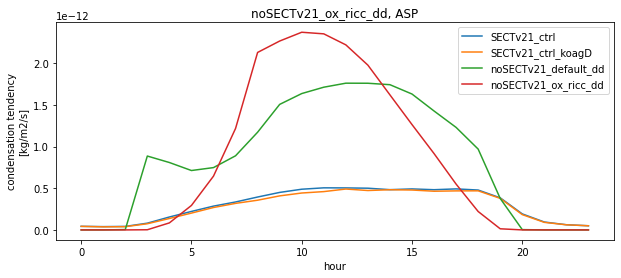

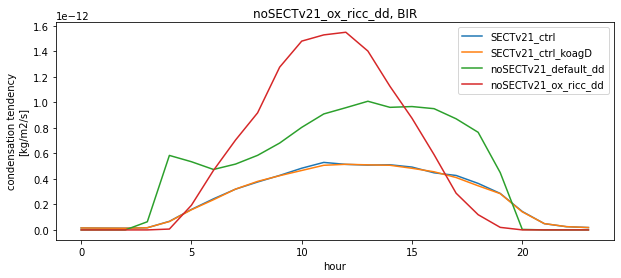

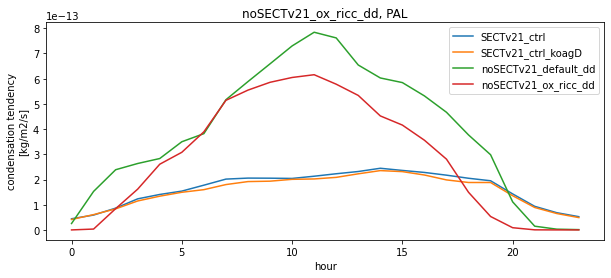

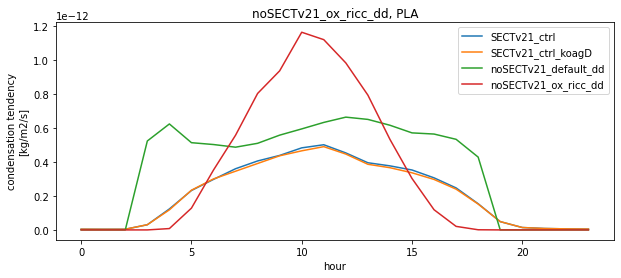

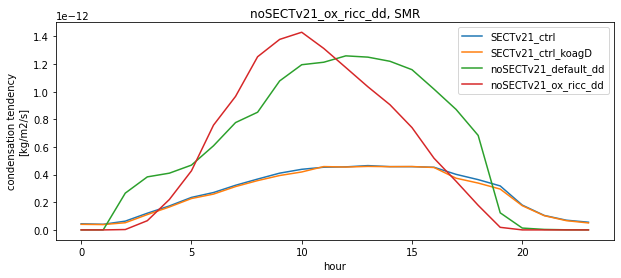

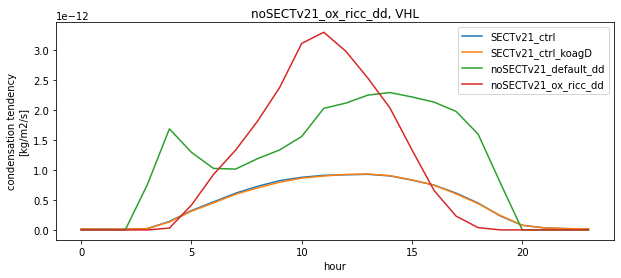

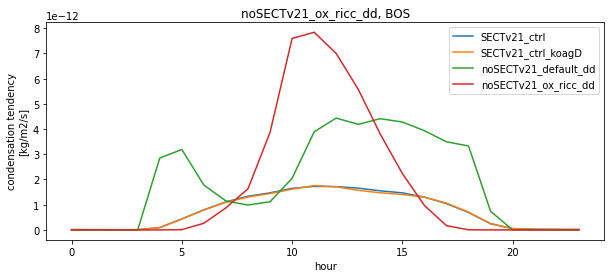

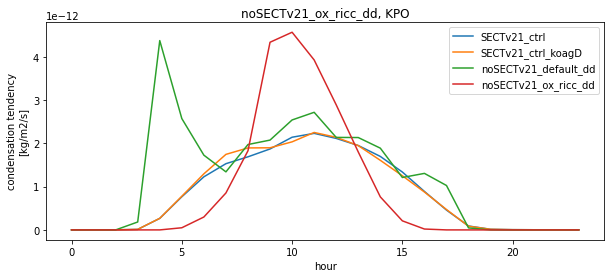

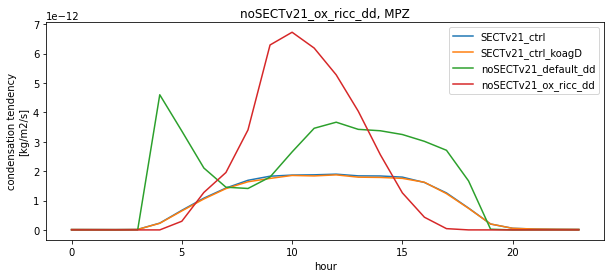

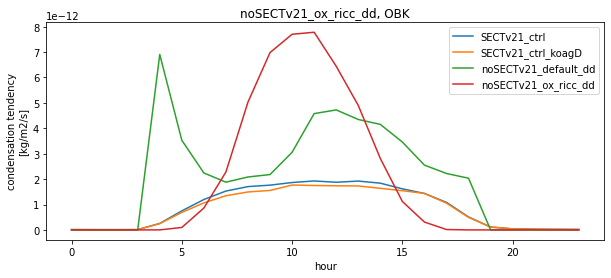

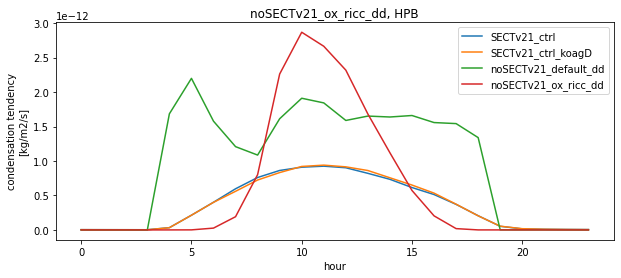

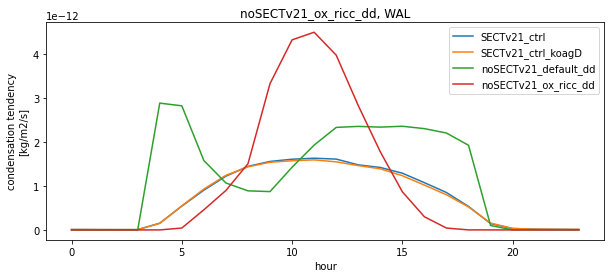

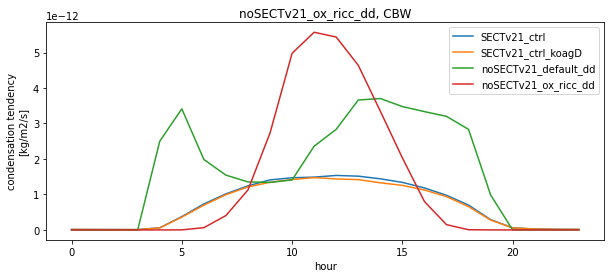

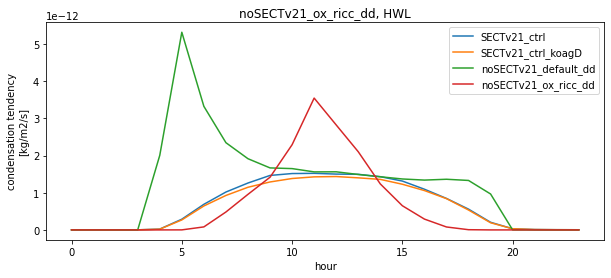

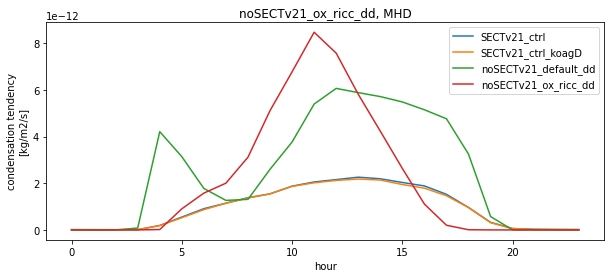

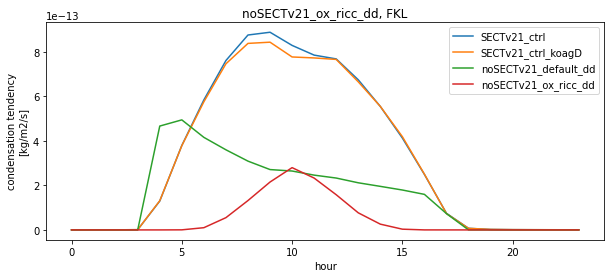

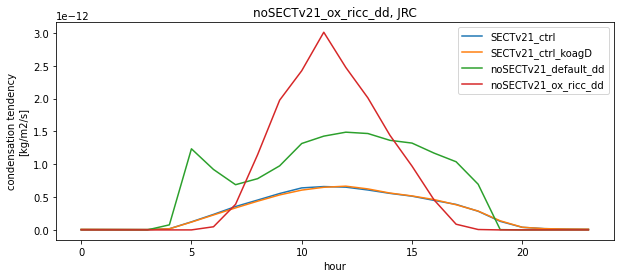

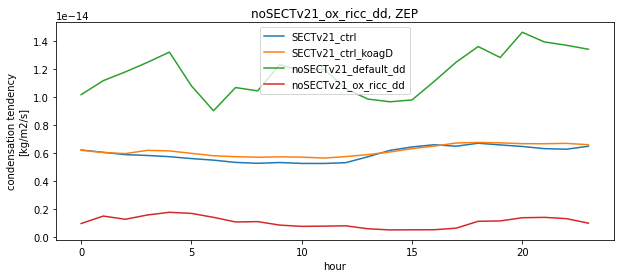

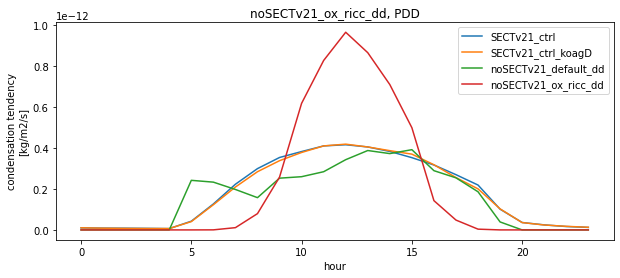

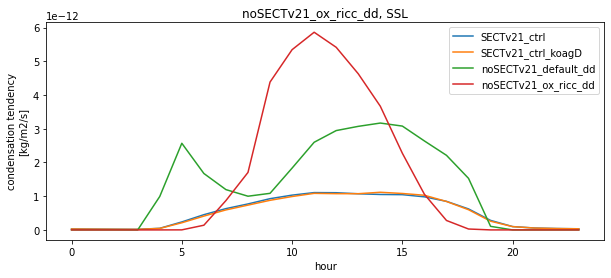

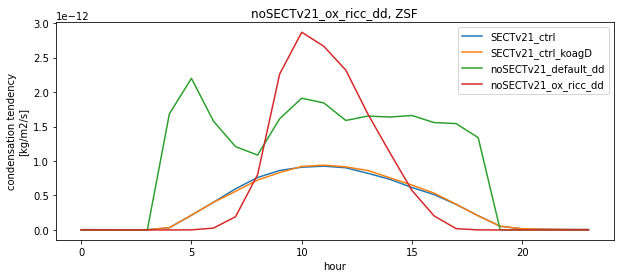

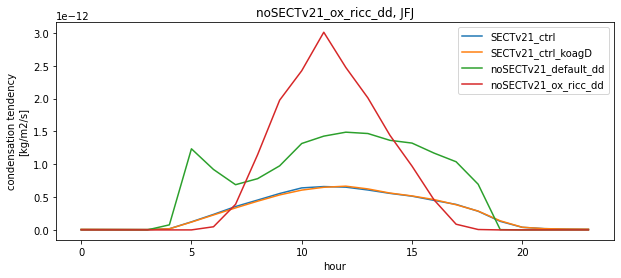

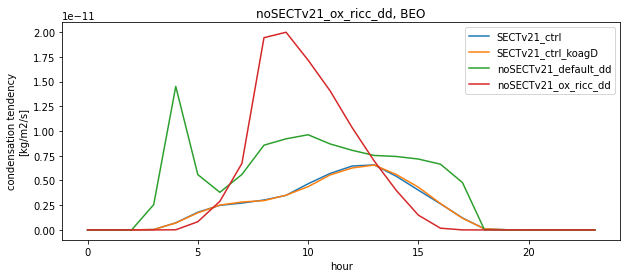

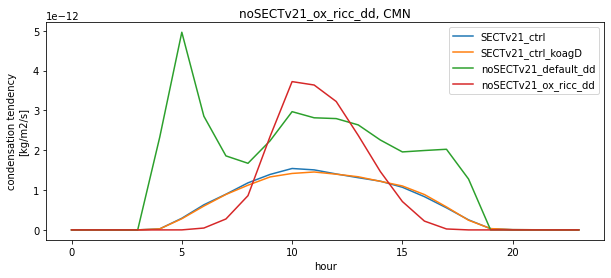

In [46]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
yscale='linear'
cmap='viridis'
var = 'SO4_NAcondTend'
var2 = 'SOA_NAcondTend'
for i in np.arange(len(stations)):
    fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
    axs=[axs]
    for case_name in cases_sec:
        ax = axs[0]
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var] + plt_ds[var2]
        plt_da = plt_da.groupby('time.hour').median()
        plt_da.plot(label=case_name, yscale=yscale)#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
        
    for case_name in cases_orig:#, axs[1:]):
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var] + plt_ds[var2]
        
        plt_da = plt_da.groupby('time.hour').median()
        
        plt_da.plot(label=case_name, yscale=yscale)#'log')#x='hour', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
    #    plt_da = (dic_sd[case_name]['dNdlogD_mod'])
    #    plt_da = plt_da.sel(time=slice(st,et)).isel(station=i, lev=-1)
    #    
    #    plt_da.plot(x='time', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap='Reds', ax=ax)
    #    ax.set_title(case_name)

    plt.legend()
    plt.show()

ASP


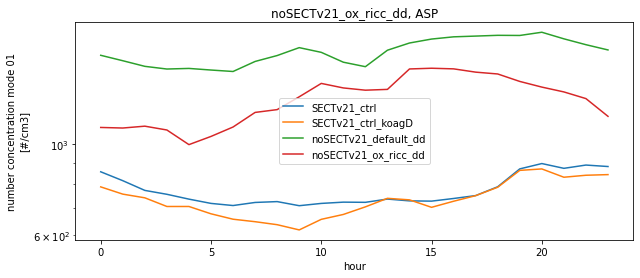

BIR


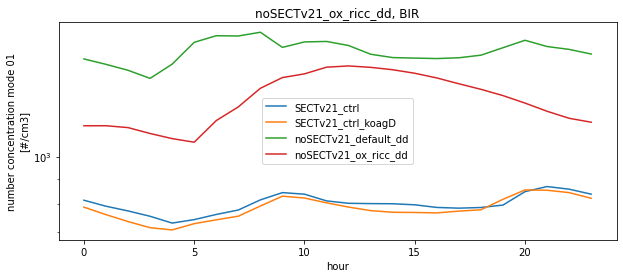

PAL


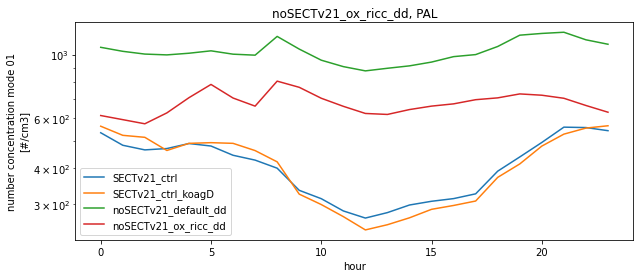

PLA


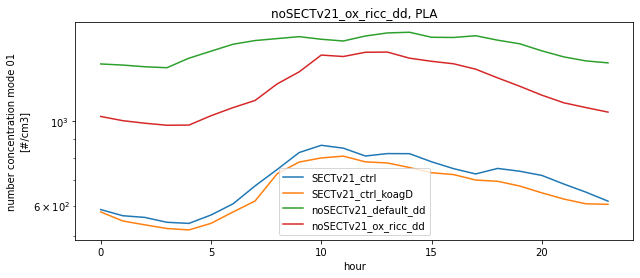

SMR


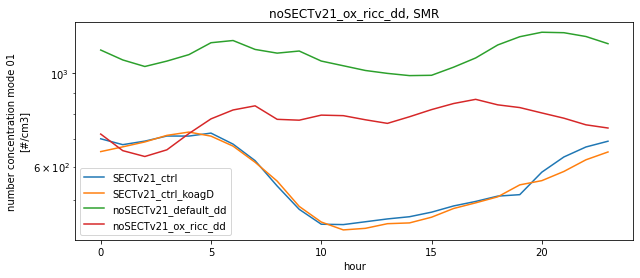

VHL


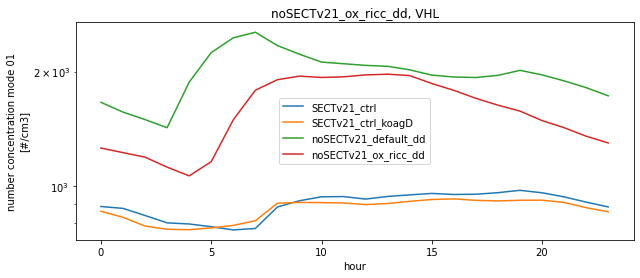

BOS


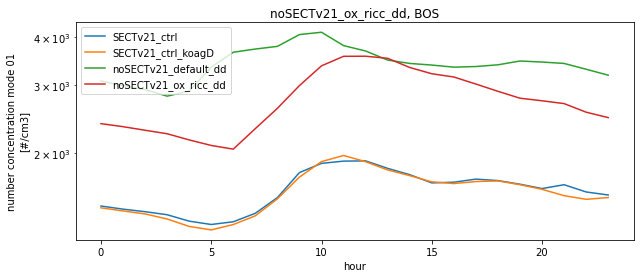

KPO


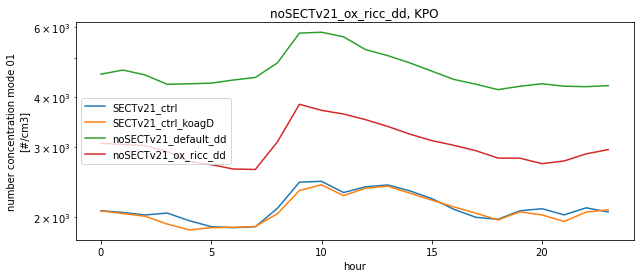

MPZ


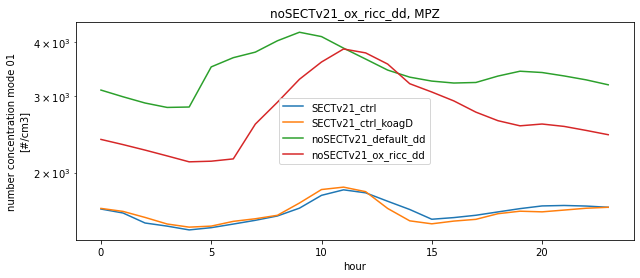

OBK


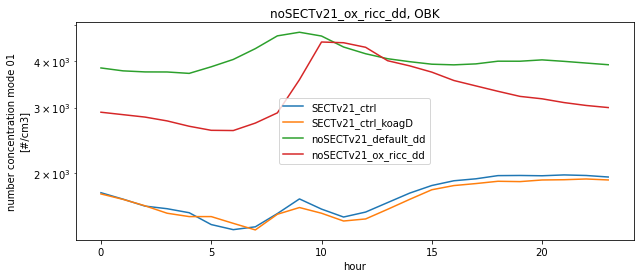

HPB


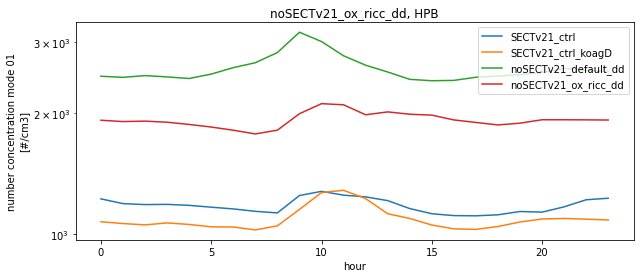

WAL


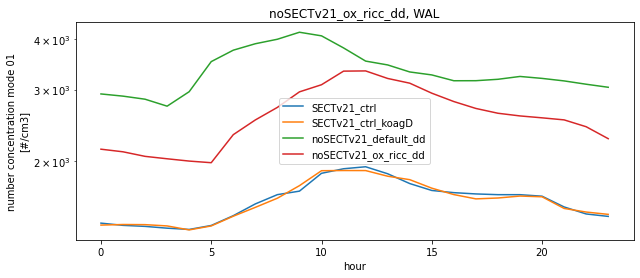

CBW


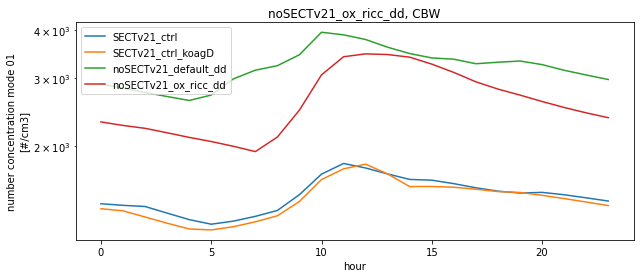

HWL


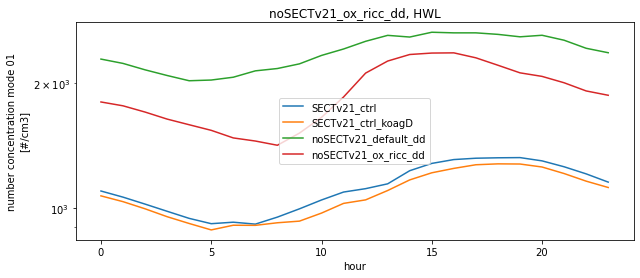

MHD


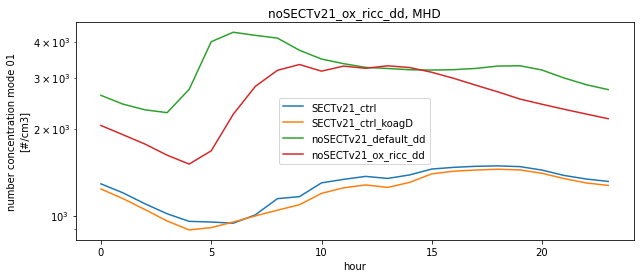

FKL


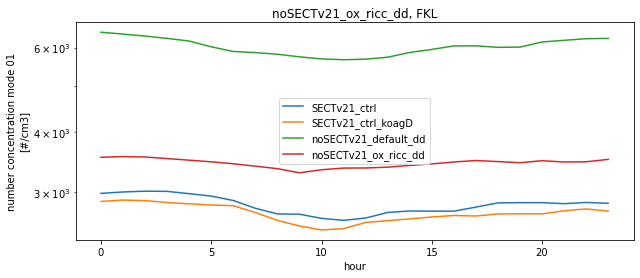

JRC


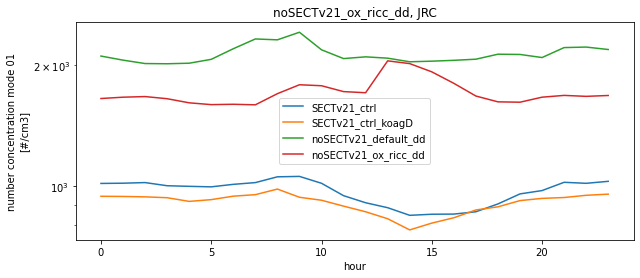

ZEP


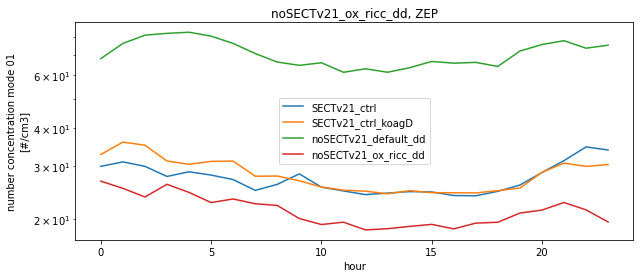

PDD


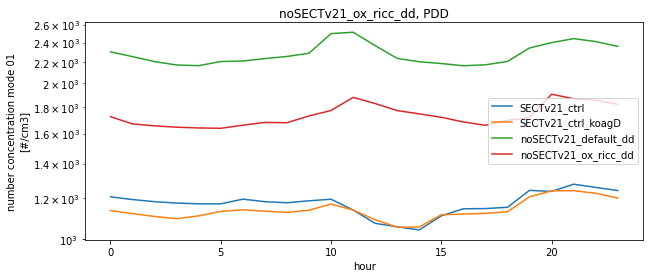

SSL


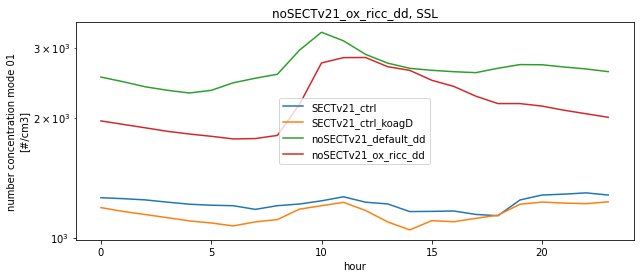

ZSF


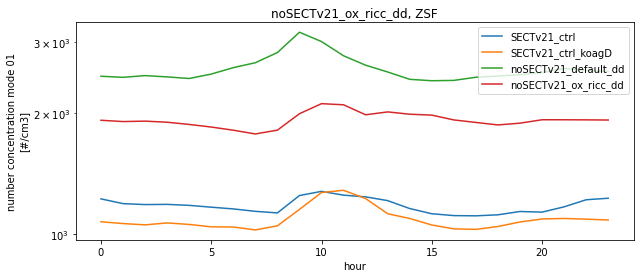

JFJ


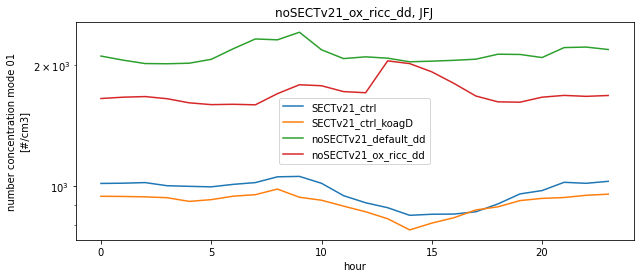

BEO


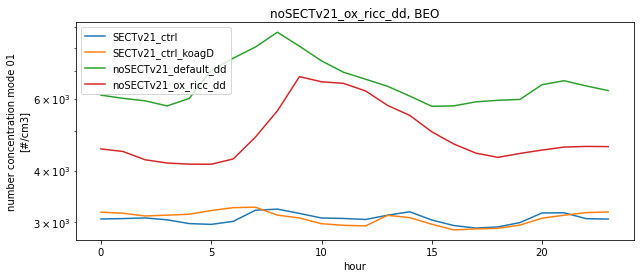

CMN


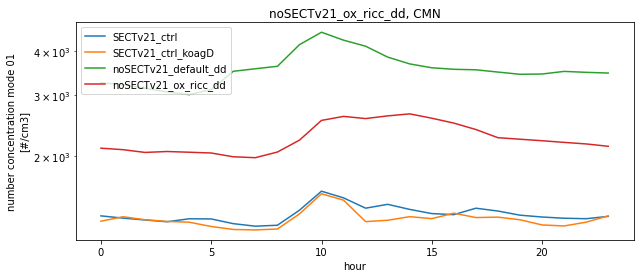

In [45]:
import matplotlib.colors as mcolors
st = '2008-03-01'
et = '2008-06-01'
cmap='viridis'
var = 'NCONC01'
for i in np.arange(len(stations)):
    print(stations[i])
    fig, axs = plt.subplots(1, figsize=[10,4], sharex=True)
    axs=[axs]
    for case_name in cases_sec:
        ax = axs[0]
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        plt_da.plot(label=case_name, yscale='log')#x='hour')#, yscale='log', ylim=[3,500], , norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
        
    for case_name in cases_orig:#, axs[1:]):
        plt_ds = dic_sd[case_name]
                  #['dNdlogD_mod']+dic_sd[case_name]['dNdlogD_sec'])
        plt_ds = plt_ds.sel(time=slice(st,et)).isel(station=i, lev=-1)
        plt_da = plt_ds[var]# + plt_ds['dNdlogD_sec']
        plt_da = plt_da.groupby('time.hour').median()
        
        plt_da.plot(label=case_name, yscale='log')#x='hour', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap=cmap, ax=ax)
        ax.set_title(f'{case_name}, {stations[i]}')
    #    plt_da = (dic_sd[case_name]['dNdlogD_mod'])
    #    plt_da = plt_da.sel(time=slice(st,et)).isel(station=i, lev=-1)
    #    
    #    plt_da.plot(x='time', yscale='log', ylim=[3,500], label=case_name, norm=mcolors.LogNorm(vmin=10,vmax=8e3), cmap='Reds', ax=ax)
    #    ax.set_title(case_name)

    plt.legend()
    plt.show()